In [42]:
clear()

In [43]:
import pandas as pd
import numpy as np

df = pd.read_csv('tortilla_prices.csv')

## Data check

In [44]:
df.tail()

,State,City,Year,Month,Day,Store type,Price per kilogram
280393,Veracruz,Coatzacoalcos,2024,4,8,Big Retail Store,NaN
280394,Veracruz,Veracruz,2024,4,8,Big Retail Store,NaN
280395,Veracruz,Xalapa,2024,4,8,Big Retail Store,NaN
280396,Yucatán,Mérida,2024,4,8,Big Retail Store,NaN
280397,Zacatecas,Zacatecas,2024,4,8,Big Retail Store,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280398 entries, 0 to 280397
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               280398 non-null  object 
 1   City                280398 non-null  object 
 2   Year                280398 non-null  int64  
 3   Month               280398 non-null  int64  
 4   Day                 280398 non-null  int64  
 5   Store type          280398 non-null  object 
 6   Price per kilogram  273902 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 15.0+ MB


In [46]:
print(df.describe())

                Year          Month            Day  Price per kilogram
count  280398.000000  280398.000000  280398.000000       273902.000000
mean     2015.128114       6.368070      15.930645           12.092700
std         4.942490       3.438586       8.757367            4.376921
min      2007.000000       1.000000       1.000000            0.000000
25%      2011.000000       3.000000       8.000000            9.570000
50%      2015.000000       6.000000      16.000000           11.180000
75%      2019.000000       9.000000      24.000000           14.000000
max      2024.000000      12.000000      31.000000           31.000000


In [47]:
df.isna().sum()

State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6496
dtype: int64

In [48]:
6496/280398

0.02316706966526152

Drop rows containing NAN

In [49]:
# Drop rows where 'Price per kilogram' is NaN
df_clean = df.dropna(subset=['Price per kilogram'])

Plot distribution of tortilla prices

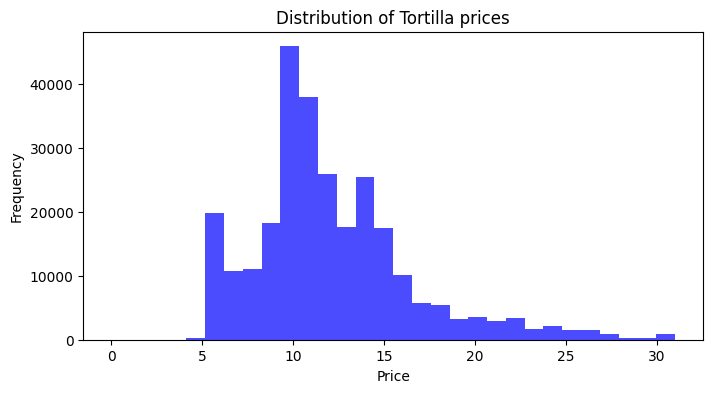

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df_clean['Price per kilogram'], bins=30, color='blue',alpha=0.7)
plt.title('Distribution of Tortilla prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## **1. Monthly price analysis**
- Monthly price growth check
- Seasonal growth check

### Monthly price growth check

In [51]:
# Group by month
monthly_mean = df_clean.groupby(['Year', 'Month'])['Price per kilogram'].mean().reset_index()

# Create a 'Date' column for plotting (using the first day of each month)
monthly_mean['Date'] = pd.to_datetime(monthly_mean[['Year', 'Month']].assign(Day=1))

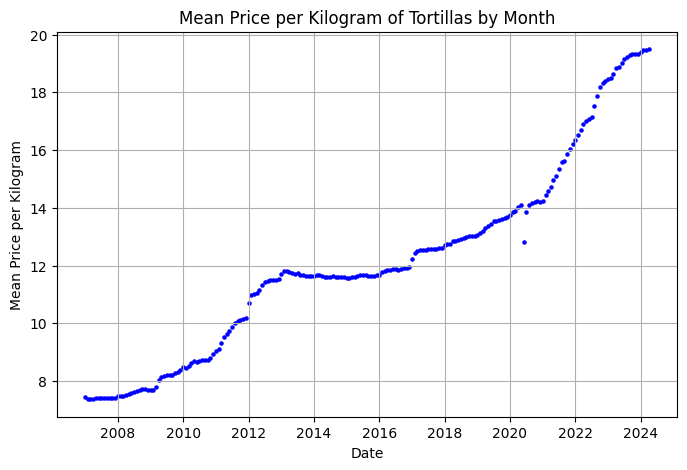

In [52]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(monthly_mean['Date'], monthly_mean['Price per kilogram'], color='blue',s=5)
plt.title('Mean Price per Kilogram of Tortillas by Month')
plt.xlabel('Date')
plt.ylabel('Mean Price per Kilogram')
plt.grid(True)
plt.show()

- The price is increasing. It seems that until 2020 the price is somewhat following a line, but after that it is rapidly increasing.

- 2020 unusual price fluctuation happened.

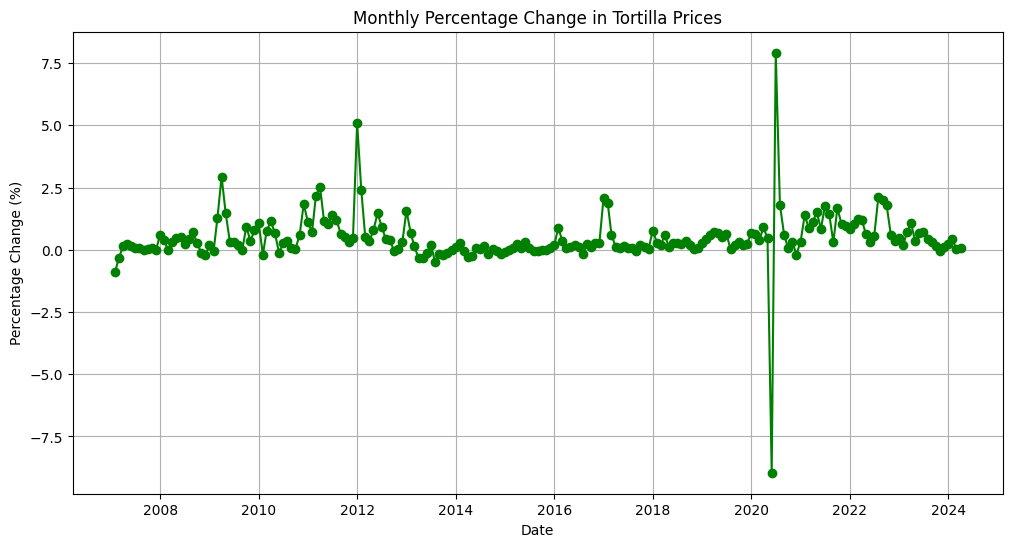

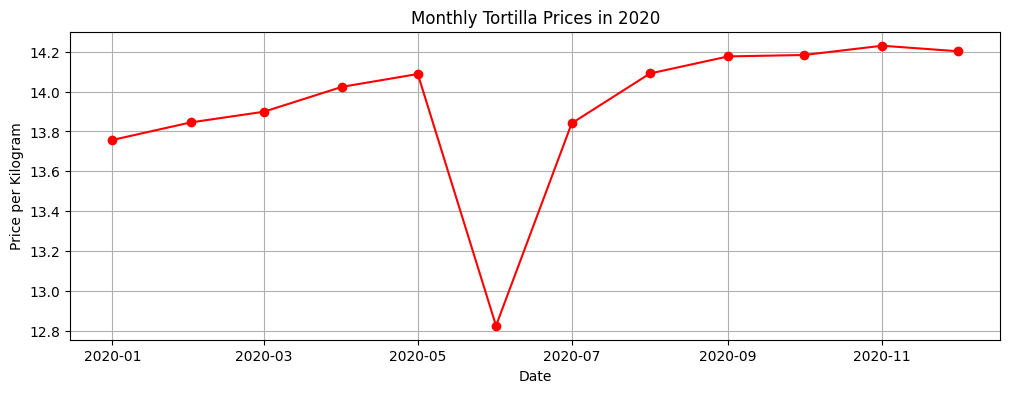

In [53]:
# Calculate the percentage change in price from month to month
monthly_mean['Price Change (%)'] = monthly_mean['Price per kilogram'].pct_change() * 100

# Extracting year 2020 for detailed analysis
year_2020 = monthly_mean[monthly_mean['Date'].dt.year == 2020]

# Plotting percentage change over the entire period
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean['Date'], monthly_mean['Price Change (%)'], marker='o', linestyle='-', color='green')
plt.title('Monthly Percentage Change in Tortilla Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()

# Plotting for 2020
plt.figure(figsize=(12, 4))
plt.plot(year_2020['Date'], year_2020['Price per kilogram'], marker='o', linestyle='-', color='red')
plt.title('Monthly Tortilla Prices in 2020')
plt.xlabel('Date')
plt.ylabel('Price per Kilogram')
plt.grid(True)
plt.show()

- Identifying Growth and Decline Phases:
During the Covid period(2020 to 2023), price change was biger than(2013 to 2020).
- In 2020 there is a significant drop in price

##**2. Seasonal price distribution**

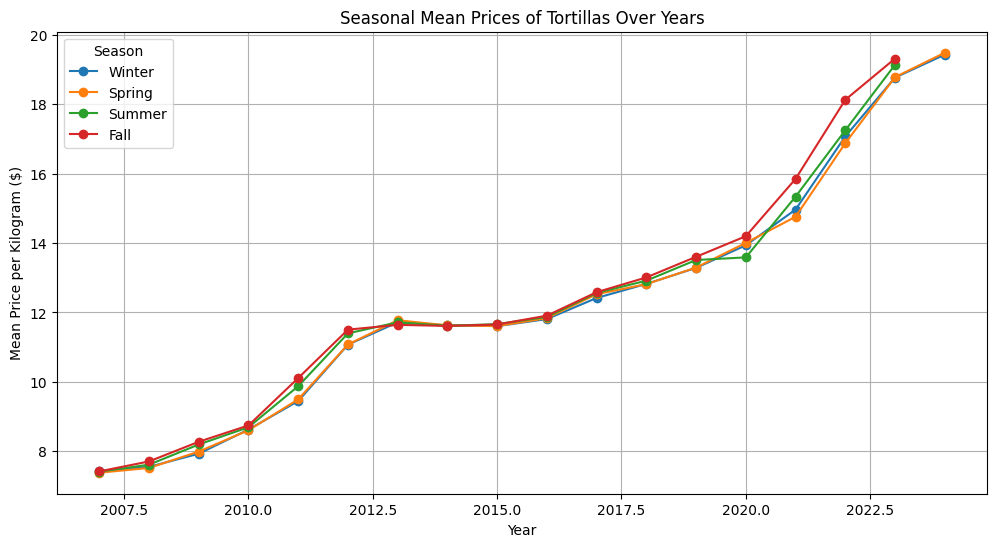

In [54]:
# Assigning season to month
month_to_season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}

# Add a 'Season' column to the DataFrame
monthly_mean['Season'] = monthly_mean['Date'].dt.month.map(month_to_season)

# Group by Year and Season, then calculate the mean
seasonal_mean = monthly_mean.groupby(['Year', 'Season'])['Price per kilogram'].mean().reset_index()

# Map seasons to a specific month for plotting (middle month of each season)
season_to_month = {
    'Winter': '01-15', # January 15
    'Spring': '04-15', # April 15
    'Summer': '07-15', # July 15
    'Fall': '10-15'   # October 15
}

# Create a 'Date' string by merging Year with the representative month
seasonal_mean['Date'] = seasonal_mean['Year'].astype(str) + '-' + seasonal_mean['Season'].map(season_to_month)

# Convert 'Date' to datetime
seasonal_mean['Date'] = pd.to_datetime(seasonal_mean['Date'])

seasonal_mean_pivot = seasonal_mean.pivot(index='Year', columns='Season', values='Price per kilogram')

# Plotting each season as a different line
plt.figure(figsize=(12, 6))
for season in ['Winter', 'Spring', 'Summer', 'Fall']:
    plt.plot(seasonal_mean_pivot.index, seasonal_mean_pivot[season], marker='o', linestyle='-', label=season)

plt.title('Seasonal Mean Prices of Tortillas Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Price per Kilogram ($)')
plt.grid(True)
plt.legend(title='Season')
plt.show()


- The prices of tortilla seems to be quite similar between seasons, but generally the prices are high in the fall and low at spring.

## **3. Compare prices by store type**

In [55]:
df_clean['Date'] = pd.to_datetime(df_clean[['Year', 'Month', 'Day']])
store_prices = df_clean.groupby(['Date', 'Store type'])['Price per kilogram'].mean().reset_index()

# Pivot data for plotting
store_prices_pivot = store_prices.pivot(index='Date', columns='Store type', values='Price per kilogram')

In [56]:
store_prices_pivot

Store type,Big Retail Store,Mom and Pop Store
Date,,
2007-01-10,5.707895,9.283421
2007-01-12,5.655750,9.525000
2007-01-15,5.540750,9.455610
2007-01-16,5.559756,9.495122
2007-01-17,5.585366,9.531707
...,...,...
2024-03-27,14.370741,24.580370
2024-04-01,14.379259,24.589815
2024-04-03,14.377593,24.584815


In [57]:
store_prices_pivot['ratio'] = store_prices_pivot['Mom and Pop Store']/store_prices_pivot['Big Retail Store']
store_prices_pivot

Store type,Big Retail Store,Mom and Pop Store,ratio
Date,,,
2007-01-10,5.707895,9.283421,1.626418
2007-01-12,5.655750,9.525000,1.684127
2007-01-15,5.540750,9.455610,1.706558
2007-01-16,5.559756,9.495122,1.707831
2007-01-17,5.585366,9.531707,1.706550
...,...,...,...
2024-03-27,14.370741,24.580370,1.710446
2024-04-01,14.379259,24.589815,1.710089
2024-04-03,14.377593,24.584815,1.709940


In [58]:
store_prices_pivot['ratio'].describe()

count    2603.000000
mean        1.467864
std         0.128557
min         1.148079
25%         1.358152
50%         1.436214
75%         1.551588
max         1.755609
Name: ratio, dtype: float64

Mom and Pop Stores are on average 1.47 times the price of Big Retail Stores.

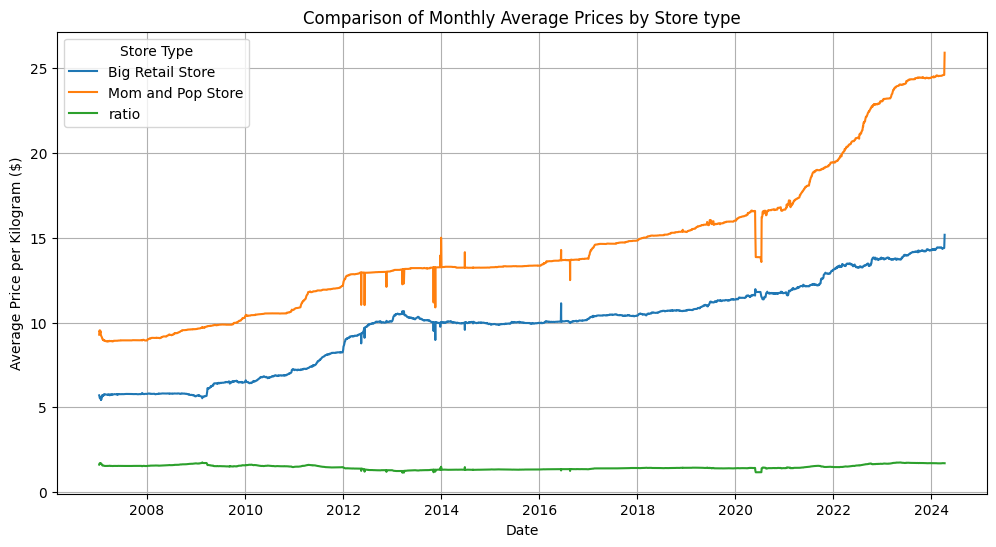

In [59]:
plt.figure(figsize=(12,6))
for column in store_prices_pivot.columns:
  plt.plot(store_prices_pivot.index, store_prices_pivot[column], marker='', label=column)

plt.title('Comparison of Monthly Average Prices by Store type')
plt.xlabel('Date')
plt.ylabel('Average Price per Kilogram ($)')
plt.grid(True)
plt.legend(title='Store Type')
plt.show()

The prices of Mom and Pop Store are bigger than Big Retail Stores. Mom and Pop Stores are on average 1.47 times the price of Big Retail Stores.

Perform statistical testing for the difference in mean

In [60]:
price_mom_and_pop = df_clean[df_clean['Store type']=='Mom and Pop Store']['Price per kilogram']
price_big_retail = df_clean[df_clean['Store type']=='Big Retail Store']['Price per kilogram']

Check for the assumptions before using t-test

In [61]:
# homogeneity of variances
from scipy import stats

# Perform Levene's test
stat, p_value = stats.levene(price_mom_and_pop, price_big_retail)

print(f"Levene's Test Statistic: {stat}, P-value: {p_value}")

Levene's Test Statistic: 24444.544217666797, P-value: 0.0


The p-value is low, indicating the variance of two groups are significantly different. We should use Welch's t-test.

In [62]:
t_stat, p_value = stats.ttest_ind(price_mom_and_pop, price_big_retail, equal_var = False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 316.95064724924015, P-value: 0.0


The t-test results show very low p-value. We can reject the null hypothesis that the two groups have equal mean, and also because the t-statistic is positive and p-value is close to 0, we can conclude that the price of "Mom and Pop store" is bigger than "Big retail store".

## **4. Regional Price Analysis**

In [63]:
import pandas as pd

# Assuming the DataFrame is loaded as df
state_average_prices = df_clean.groupby(['State'])['Price per kilogram'].mean().reset_index()
city_average_prices = df_clean.groupby(['City'])['Price per kilogram'].mean().reset_index()

Sort by price state

In [64]:
#Sort the DataFrame by the 'Price per kilogram' column in descending order
sorted_states = state_average_prices.sort_values(by='Price per kilogram', ascending=False)

# Get the top 3 cities with the highest prices
top_states = sorted_states.head(3)

# Get the lowest 3 cities with the lowest prices
lowest_states = sorted_states.tail(3)

# Display the results
print("Top 3 States with the Highest Prices:")
print(top_states)
print("\nBottom 3 States with the Lowest Prices:")
print(lowest_states)

Top 3 States with the Highest Prices:
              State  Price per kilogram
25           Sonora           13.554493
1   Baja California           13.408745
6          Coahuila           12.978632

Bottom 3 States with the Lowest Prices:
       State  Price per kilogram
8       D.F.           10.897194
20    Puebla           10.076969
28  Tlaxcala            9.922403


Sort by price city

In [65]:
# Sort the DataFrame by the 'Price per kilogram' column in descending order
sorted_cities = city_average_prices.sort_values(by='Price per kilogram', ascending=False)

# Get the top 3 cities with the highest prices
top_cities = sorted_cities.head(3)

# Get the lowest 3 cities with the lowest prices
lowest_cities = sorted_cities.tail(3)

# Display the results
print("Top 3 Cities with the Highest Prices:")
print(top_cities)
print("\nBottom 3 Cities with the Lowest Prices:")
print(lowest_cities)

Top 3 Cities with the Highest Prices:
                     City  Price per kilogram
19             Hermosillo           14.244065
24               Mexicali           14.093498
39  San Luis Río Colorado           13.825231

Bottom 3 Cities with the Lowest Prices:
         City  Price per kilogram
54  ZM Puebla            9.990232
44   Tlaxcala            9.922403
20   Irapuato            9.373015


Calculate variance of price within region

In [66]:
# Calculating variance of prices within each city
city_variance = df_clean.groupby('City')['Price per kilogram'].var()

# Calculating variance of prices within each state
state_variance = df_clean.groupby('State')['Price per kilogram'].var()

city_variance.head(), state_variance.head()


(City
 Acapulco          29.597928
 Aguascalientes    12.071372
 Campeche          22.141294
 Cancún            22.137980
 Cd. Juárez        13.442519
 Name: Price per kilogram, dtype: float64,
 State
 Aguascalientes         12.071372
 Baja California        25.838702
 Baja California Sur    25.092428
 Campeche               22.141294
 Chiapas                15.318225
 Name: Price per kilogram, dtype: float64)

Sort by variance

In [67]:
sorted_variances_states = state_variance.sort_values(ascending=False)
sorted_variances_cities = city_variance.sort_values(ascending=False)

sorted_variances_states.head(1), sorted_variances_states.tail(1), sorted_variances_cities.head(1), sorted_variances_cities.tail(1)

(State
 Sonora    29.192412
 Name: Price per kilogram, dtype: float64,
 State
 Puebla    5.919433
 Name: Price per kilogram, dtype: float64,
 City
 Hermosillo    38.252688
 Name: Price per kilogram, dtype: float64,
 City
 ZM Puebla    5.099053
 Name: Price per kilogram, dtype: float64)

## **5. Relevant features**

In [68]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Impute missing values in the 'Price per kilogram' column with the median of the column
imputer = SimpleImputer(strategy='median')
df_clean['Price per kilogram'] = imputer.fit_transform(df_clean[['Price per kilogram']])

# Select categorical and numeric features for processing
categorical_features = ['State', 'City', 'Store type']
numeric_features = ['Year', 'Month', 'Day']

# Create a transformer pipeline to handle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply the preprocessing pipeline to the data
X = preprocessor.fit_transform(df_clean.drop('Price per kilogram', axis=1))
y = df_clean['Price per kilogram'].values

In [69]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
feature_names = preprocessor.get_feature_names_out()

In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Instantiate the base model
linear_regressor = LinearRegression()

# Setting up RFE with the linear regressor, selecting top 10 features for simplicity
rfe = RFE(estimator=linear_regressor, n_features_to_select=10, step=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Check the ranking of the features
rfe_ranking = rfe.ranking_
rfe_support = rfe.support_

# Correcting the features name here
rfe_results_df = pd.DataFrame({
    'Feature': feature_names,  # Use feature_names instead of features
    'Ranking': rfe_ranking,
    'Selected': rfe_support
}).sort_values(by='Ranking')


In [72]:
# Display the top 10 features
rfe_results_df_10 = rfe_results_df.head(10)
rfe_results_df_10

,Feature,Ranking,Selected
92,cat__Store type_Mom and Pop Store,1,True
42,cat__City_Celaya,1,True
23,cat__State_Puebla,1,True
91,cat__Store type_Big Retail Store,1,True
16,cat__State_Hidalgo,1,True
55,cat__City_Irapuato,1,True
59,cat__City_Mexicali,1,True
54,cat__City_Hermosillo,1,True
85,cat__City_Xalapa,1,True
79,cat__City_Tlaxcala,1,True
